In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
lastDateQuery = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in lastDateQuery:
    latestDate = date
query_date = latestDate.split('-')
yrAgo = dt.date(int(query_date[0]),int(query_date[1]),int(query_date[2])) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
qryLastYrPrecip = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= yrAgo).filter(Measurement.date <= latestDate).order_by(Measurement.date).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dfPRCP = pd.DataFrame(qryLastYrPrecip,columns=['date','precipitation'])
# Sort the dataframe by date
dfPRCP.set_index('date',inplace=True)


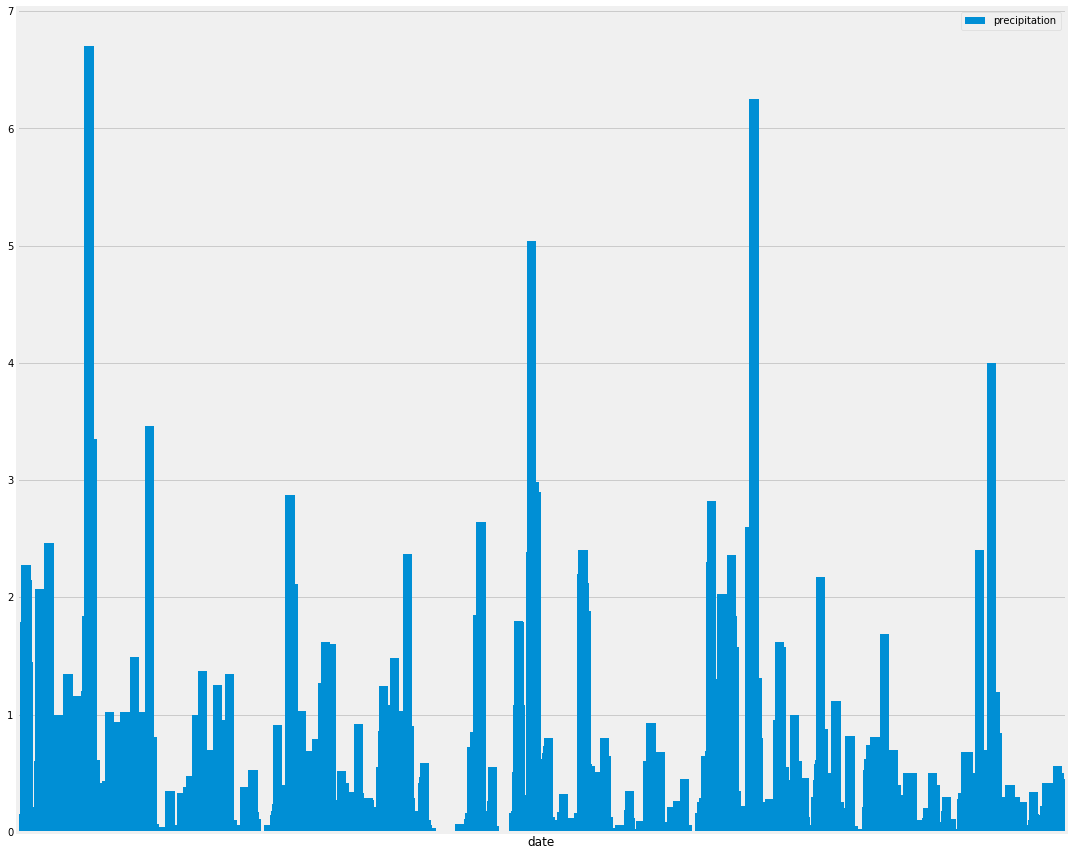

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
dfPRCP.plot(kind='bar', stacked=True,figsize=(15,12), width=20)
plt.xticks([])
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dfPRCP.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
qryStationCoumt = session.query(Station.station).count()
qryStationCoumt

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
qryActiveStations = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
# List the stations and the counts in descending order.
qryActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
qryDescribeStations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
qryDescribeStations

[('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qryStation = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= yrAgo).filter(Measurement.date <= latestDate).order_by(Measurement.date).all()
qryStation

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [21]:
dfStation = pd.DataFrame(qryStation,columns=['date','tobs'])
dfStation.set_index('date',inplace=True)
dfStation.head()



,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


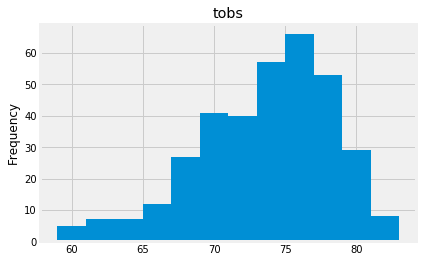

In [23]:
# We can set the number of bins with the `bins` kwarg
hist = dfStation.hist(bins=12)
for ax in hist.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [13]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d 
    Returns:
        TMIN, TAVE, and TMAX
    """       
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

def subtractYear(date, years): 
    """subtract (n)years from date provided
    Args:
        date (string): A date string in the format %Y-%m-%d
        years (integer): number of years to be subtracted from date
    Returns:
        date
    """       
    #subtract (n)years from date provided
    date = date.split('-')
    date[0] = int(date[0]) - years
    date=str(date[0])+'-'+str(date[1])+'-'+str(date[2])
    return date

# function usage example
print(calc_temps(subtractYear('2017-03-11',1), subtractYear('2017-03-14',1)))

[(66.0, 71.41666666666667, 77.0)]


In [14]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
lastYearTemps = calc_temps(subtractYear('2017-03-11',1), subtractYear('2017-03-21',1))

lastYearTempsMin = lastYearTemps[0][0]
lastYearTempsMax = lastYearTemps[0][2]
lastYearTempsAvg = lastYearTemps[0][1]
tempRange = lastYearTempsMax - lastYearTempsMin

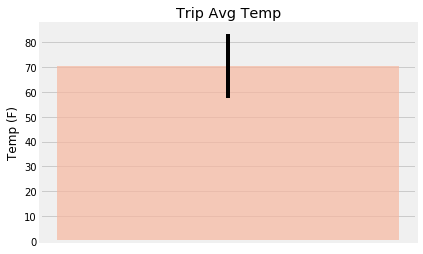

In [15]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
ax.bar( 0,lastYearTempsAvg,yerr=tempRange, align='center', alpha=0.7,width=0.1, capsize=0, color="#f7b79f")
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')

plt.xticks([])
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [16]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [17]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
def getDatesInRange(start_date,end_date):
    return session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).order_by(Measurement.date).all()
# Use the start and end date to create a range of dates
startDate = '2016-03-01'
endDate = '2016-03-21'
dateRange = [r[0] for r in getDatesInRange(subtractYear(startDate,1),subtractYear(endDate,1))]

# Stip off the year and save a list of %m-%d strings
def stripYear(date):
    date = str(date).split('-')
    newDate=date[1]+'-'+date[2]
    return newDate

mdDateRange = []
for date in dateRange:
    mdDateRange.append(stripYear(str(date)))
    
mdDateRange

# Loop through the list of %m-%d strings and calculate the normals for each date
mdNormals = []
for md in mdDateRange:
    mdNormals.append(daily_normals(md))

mdNormals


[[(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)],
 [(60.0, 69.20338983050847, 76.0)],
 [(60.0, 69.17241379310344, 78.0)],
 [(59.0, 68.72413793103448, 78.0)],
 [(57.0, 68.56140350877193, 75.0)],
 [(57.0, 69.12280701754386, 75.0)],
 [(60.0, 69.89285714285714, 82.0)],
 [(62.0, 69.88888888888889, 80.0)],
 [(56.0, 69.29629629629629, 77.0)],
 [(62.0, 70.32758620689656, 77.0)],
 [(58.0, 68.54716981132076, 76.0)],
 [(60.0, 69.70370370370371, 78.0)],
 [(57.0, 68.54, 75.0)],
 [(57.0, 67.7843137254902, 76.0)],
 [(60.0, 69.1, 75.0)],
 [(62.0, 70.11764705882354, 80.0)],
 [(60.0, 71.07692307692308, 77.0)]]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
mdDaily = []
for i in mdNormals:
    for j in i:
        mdDaily.append(j)
mdDaily
dfTrip = pd.DataFrame(mdDaily,columns=["tmin","tavg","tmax"])
dfTrip['date'] = [r[0] for r in getDatesInRange(startDate,endDate)]
dfTrip.set_index('date',inplace=True)
dfTrip.head()

,tmin,tavg,tmax
date,,,
2016-03-01,64.0,70.032787,76.0
2016-03-02,61.0,70.366667,78.0
2016-03-03,60.0,70.068966,78.0
2016-03-04,57.0,69.272727,77.0
2016-03-05,60.0,67.890909,76.0


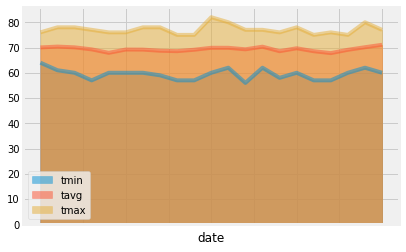

In [42]:
# Plot the daily normals as an area plot with `stacked=False`
dfTrip.plot.area(stacked=False)